# Exploratory Data Analysis on Student Academic Background and Score
#### By Vedant Thakur

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df = pd.read_csv('Student_Academic_Dataset.csv', encoding='latin-1')

In [188]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [189]:
df = df.rename(columns={'fNAME':'FirstName','lNAME':'LastName','gender':'Gender','country':'Country','residence':'Residence',
                        'entryEXAM':'EntryExamScore','prevEducation':'PreviousEducation','studyHOURS':'StudyHours',
                        'Python':'PythonScore','DB':'DBScore'})

In [190]:
df.head()

,FirstName,LastName,Age,Gender,Country,Residence,EntryExamScore,PreviousEducation,StudyHours,PythonScore,DBScore
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [191]:
df.shape

(77, 11)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FirstName          77 non-null     object 
 1   LastName           77 non-null     object 
 2   Age                77 non-null     int64  
 3   Gender             77 non-null     object 
 4   Country            77 non-null     object 
 5   Residence          77 non-null     object 
 6   EntryExamScore     77 non-null     int64  
 7   PreviousEducation  77 non-null     object 
 8   StudyHours         77 non-null     int64  
 9   PythonScore        75 non-null     float64
 10  DBScore            77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [193]:
df.isna().sum()

FirstName            0
LastName             0
Age                  0
Gender               0
Country              0
Residence            0
EntryExamScore       0
PreviousEducation    0
StudyHours           0
PythonScore          2
DBScore              0
dtype: int64

In [194]:
df = df.dropna()

In [195]:
df.isna().sum()

FirstName            0
LastName             0
Age                  0
Gender               0
Country              0
Residence            0
EntryExamScore       0
PreviousEducation    0
StudyHours           0
PythonScore          0
DBScore              0
dtype: int64

In [196]:
genders_before = df['Gender'].unique()
print(', '.join(genders_before))

Female, M, Male, female, male


In [197]:
df['Gender'] = df['Gender'].str.strip().str.lower()

In [198]:
df['Gender'] = df['Gender'].replace({'m':'male'})

In [199]:
df['Gender'] = df['Gender'].str.capitalize()
genders_after = df['Gender'].unique()
print(', '.join(genders_after))

Female, Male


In [200]:
countries_before = df['Country'].unique()
print(', '.join(countries_before))

Norway, Kenya, Uganda, South Africa, Norge, norway, Denmark, Netherlands, Italy, Spain, UK, Somali, Nigeria, Germany, France


Here Norway, Norge and norway are same

In [201]:
df['Country'] = df['Country'].astype(str).str.strip().str.title()
df['Country'] = df['Country'].replace({'Norge':'Norway','norway':'Norway'})
countries_after = df['Country'].unique()
print(', '.join(countries_after))

Norway, Kenya, Uganda, South Africa, Denmark, Netherlands, Italy, Spain, Uk, Somali, Nigeria, Germany, France


In [202]:
residence_before = df['Residence'].unique()
print(', '.join(residence_before))

Private, Sognsvann, BI Residence, BI-Residence, BIResidence, BI_Residence


Here BI Residence, BI-Residence, BIResidence and BI_Residence all are same

In [203]:
df['Residence'] = df['Residence'].replace({'BI-Residence': 'BI Residence', 'BIResidence': 'BI Residence', 'BI_Residence': 'BI Residence'})
residence_after = df['Residence'].unique()
print("Unique Residences After Standardization:")
print(', '.join(residence_after))

Unique Residences After Standardization:
Private, Sognsvann, BI Residence


In [204]:
prev_education_before = df['PreviousEducation'].unique()
print(', '.join(prev_education_before))

Masters, Diploma, HighSchool, High School, Bachelors, Barrrchelors, diploma, DIPLOMA, Diplomaaa, Doctorate


Let's sort these out

In [205]:
df['PreviousEducation'] = df['PreviousEducation'].str.strip().str.lower()
print(df['PreviousEducation'].unique())
df['PreviousEducation'] = df['PreviousEducation'].replace({'highschool':'high School','barrrchelors':'Bachelors', 'diplomaaa': 'Diploma', 'doctorate': 'PhD'})
df['PreviousEducation'] = df['PreviousEducation'].str.capitalize()
prev_education_after = df['PreviousEducation'].unique()
print(', '.join(prev_education_after))

['masters' 'diploma' 'highschool' 'high school' 'bachelors' 'barrrchelors'
 'diplomaaa' 'doctorate']
Masters, Diploma, High school, Bachelors, Phd


In [206]:
df.shape

(75, 11)

In [207]:
df.head()

,FirstName,LastName,Age,Gender,Country,Residence,EntryExamScore,PreviousEducation,StudyHours,PythonScore,DBScore
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High school,130,74.0,50
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High school,122,91.0,80
5,Hannah,Hansen,25,Female,Norway,BI Residence,66,High school,130,88.0,59


In [208]:
df['PythonScore'] = df['PythonScore'].astype(int)

In [209]:
df.head()

,FirstName,LastName,Age,Gender,Country,Residence,EntryExamScore,PreviousEducation,StudyHours,PythonScore,DBScore
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High school,130,74,50
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High school,122,91,80
5,Hannah,Hansen,25,Female,Norway,BI Residence,66,High school,130,88,59


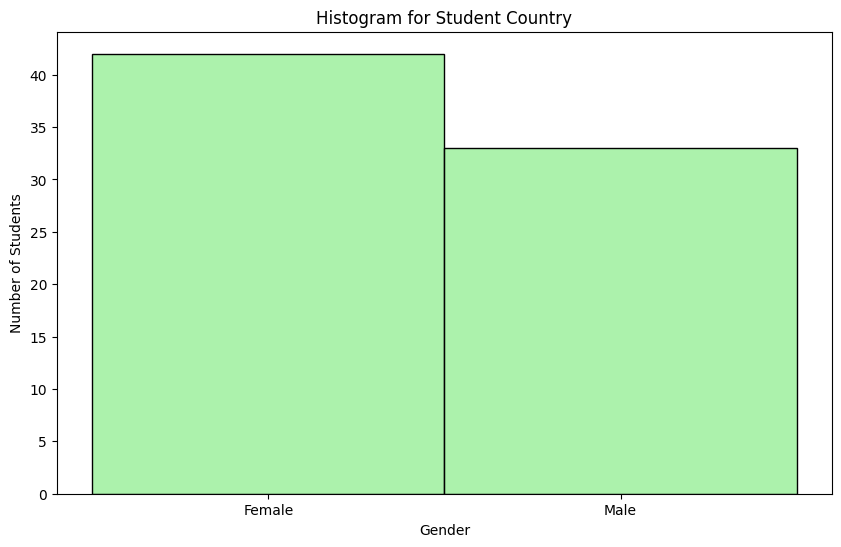

In [235]:
plt.figure(figsize=(10,6))
sns.histplot(df['Gender'], color='lightgreen')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Histogram for Student Country')
plt.show()

#### Visualisations

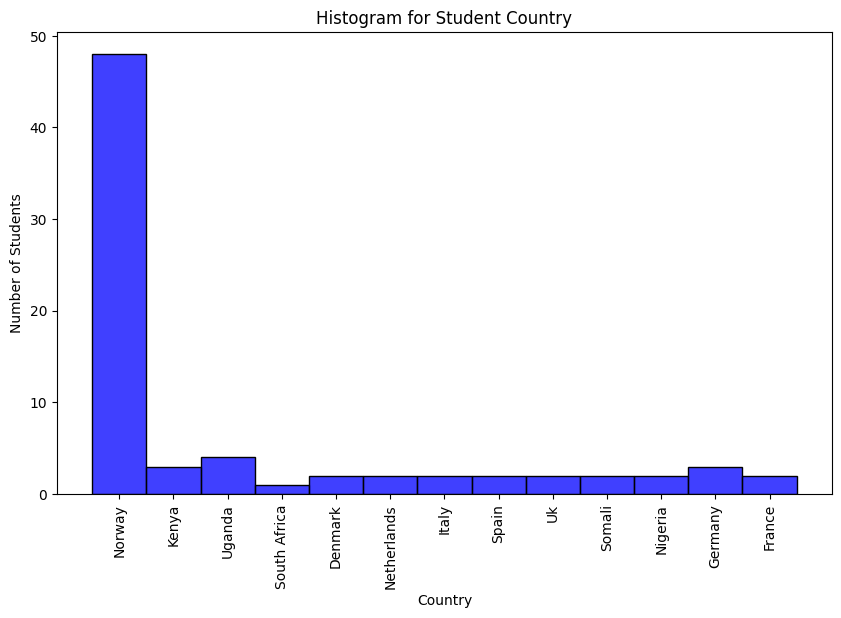

In [213]:
plt.figure(figsize=(10,6))
sns.histplot(df['Country'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Students')
plt.title('Histogram for Student Country')
plt.show()

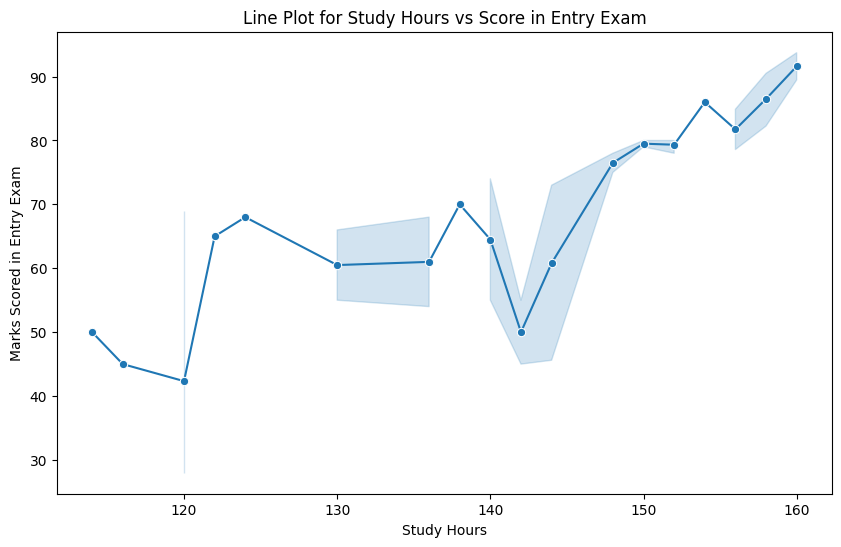

In [223]:
plt.figure(figsize=(10,6))
sns.lineplot(x='StudyHours',y='EntryExamScore', data=df, marker='o')
plt.xlabel('Study Hours')
plt.ylabel('Marks Scored in Entry Exam')
plt.title('Line Plot for Study Hours vs Score in Entry Exam')
plt.show()

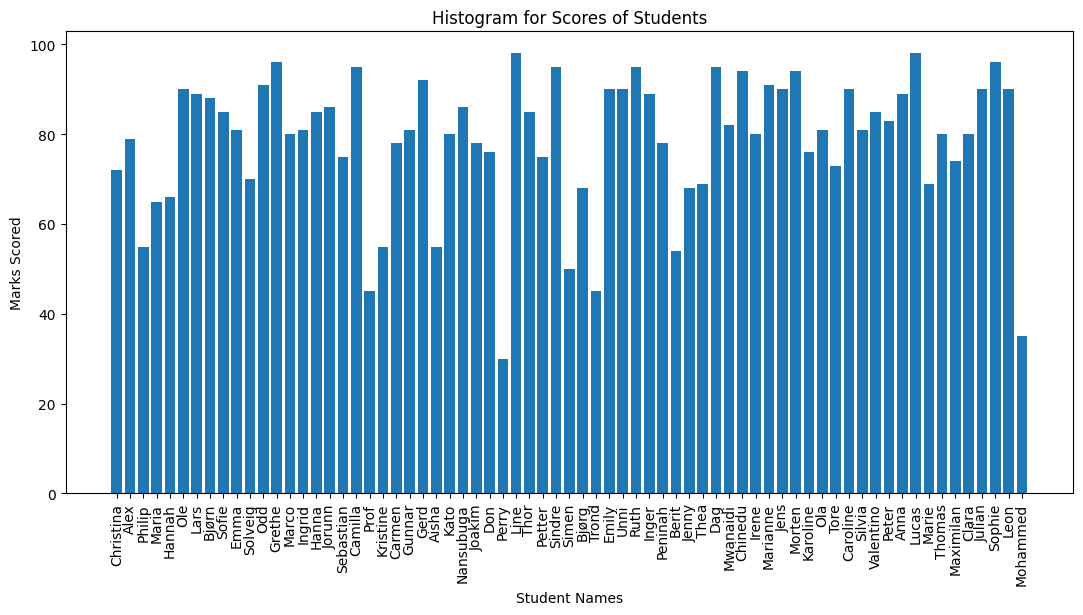

In [257]:
plt.figure(figsize=(13,6))
plt.bar(df['FirstName'],df['EntryExamScore'])
plt.xticks(rotation=90)
plt.xlabel('Student Names')
plt.ylabel('Marks Scored')
plt.title('Histogram for Scores of Students')
plt.show()

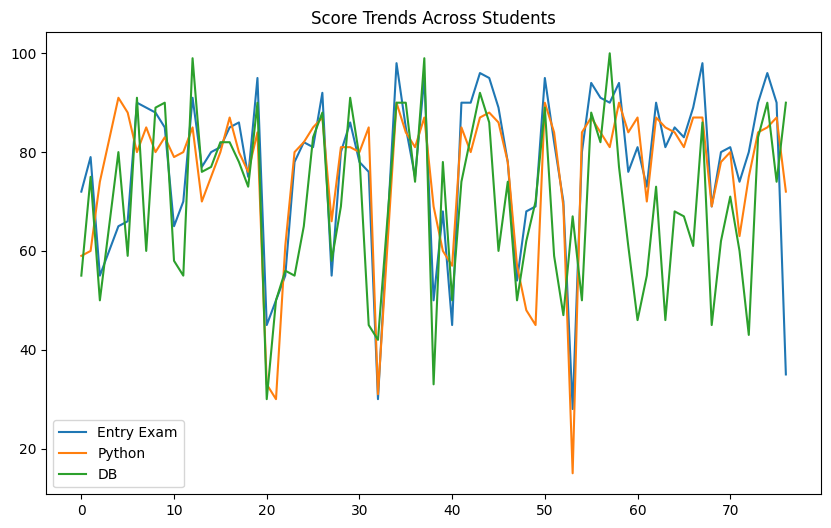

In [243]:
plt.figure(figsize=(10,6))
plt.plot(df['EntryExamScore'], label='Entry Exam')
plt.plot(df['PythonScore'], label='Python')
plt.plot(df['DBScore'], label='DB')
plt.legend()
plt.title('Score Trends Across Students')
plt.show()

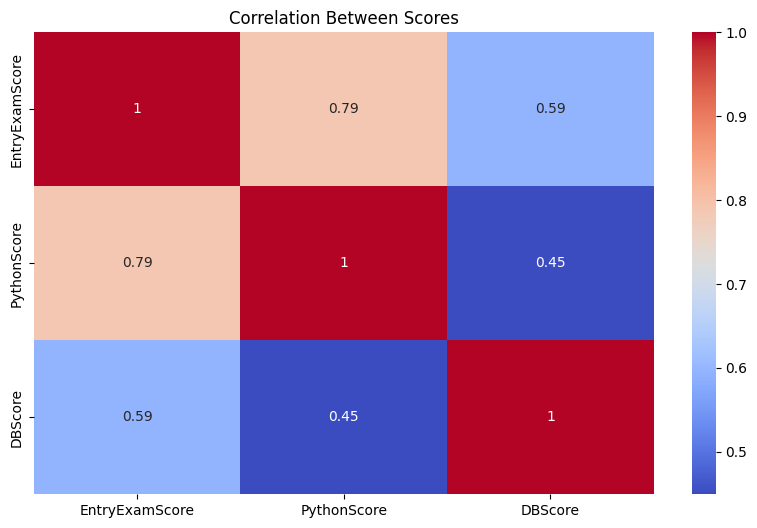

In [246]:
correlation_matrix = df[['EntryExamScore', 'PythonScore', 'DBScore']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')
plt.show()

In [250]:
df['AverageScore'] = df[['PythonScore','DBScore']].mean(axis=1)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_1536\469104397.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AverageScore', y='FirstName', data=df, ci=None)


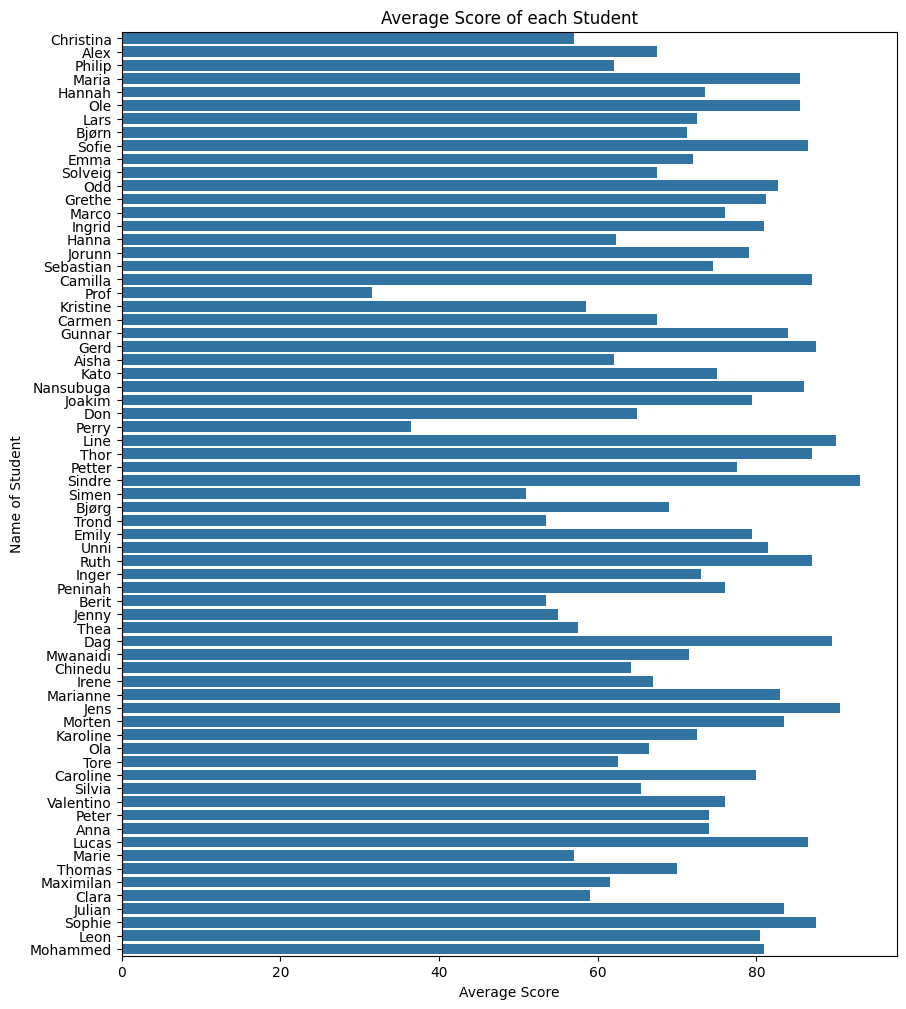

In [255]:
plt.figure(figsize=(10,12))
sns.barplot(x='AverageScore', y='FirstName', data=df, ci=None)
plt.xlabel('Average Score')
plt.ylabel('Name of Student')
plt.title('Average Score of each Student')
plt.show()